# CTGs ANALYSIS AND IMPACT ON FETAL HEALTH

In [1]:
# import liabries for data wrangling
import warnings
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# import libraries for model building
from category_encoders import OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [2]:
# create wrangle function
def wrangle (filepath):
    
    # read csv file into dataframe
    df = pd.read_csv(filepath) 
    
    # identify and drop leaky columns
    drop_cols = [col for col in df.columns if "histogram" in col]
    df.drop(columns = drop_cols, inplace=True)
     
    return df

In [3]:
# read in the data
df = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Foetal Health\\foetal_health.csv")
print("df.shape:", df.shape)
print("df.info:", df.info())
df.head() 

df.shape: (2126, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_sho

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


In [4]:
# save df
df.to_csv("\\Users\\Cheryl\\Documents\\Python Scripts\\Foetal Health\\foetal_health_clean.csv", index=False)

In [5]:
df = pd.read_csv("\\Users\\Cheryl\\Documents\\Python Scripts\\Foetal Health\\foetal_health_clean.csv")
print("df.shape:", df.shape)
print("df.info:", df.info())
df.head()

df.shape: (2126, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_sho

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


## EXPLANATORY DATA ANALYSIS

In [6]:
# summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


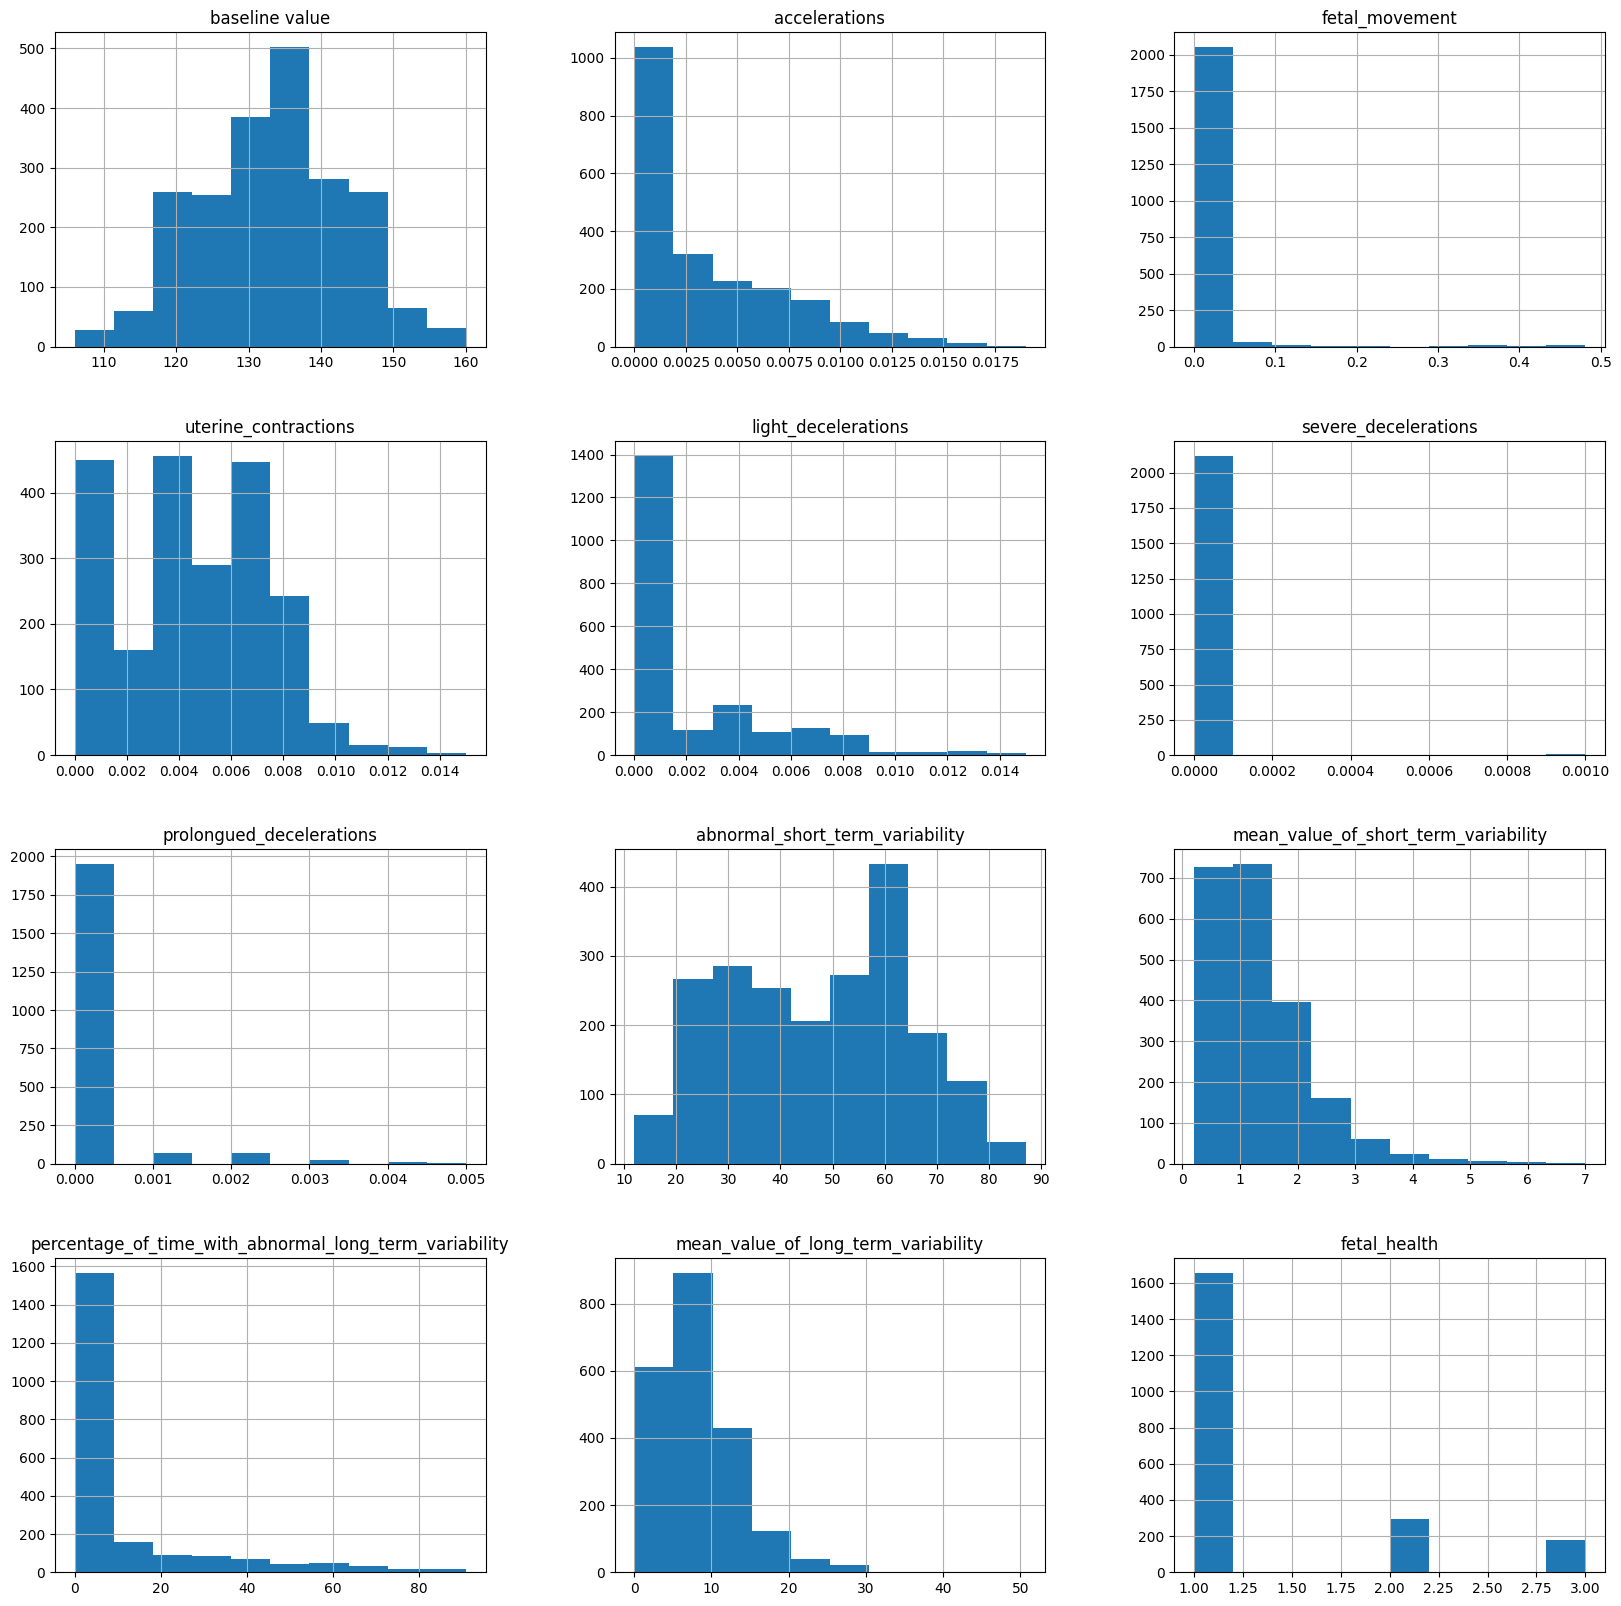

In [7]:
# plot histograms
df_histplot = df.hist(figsize=(20,20))

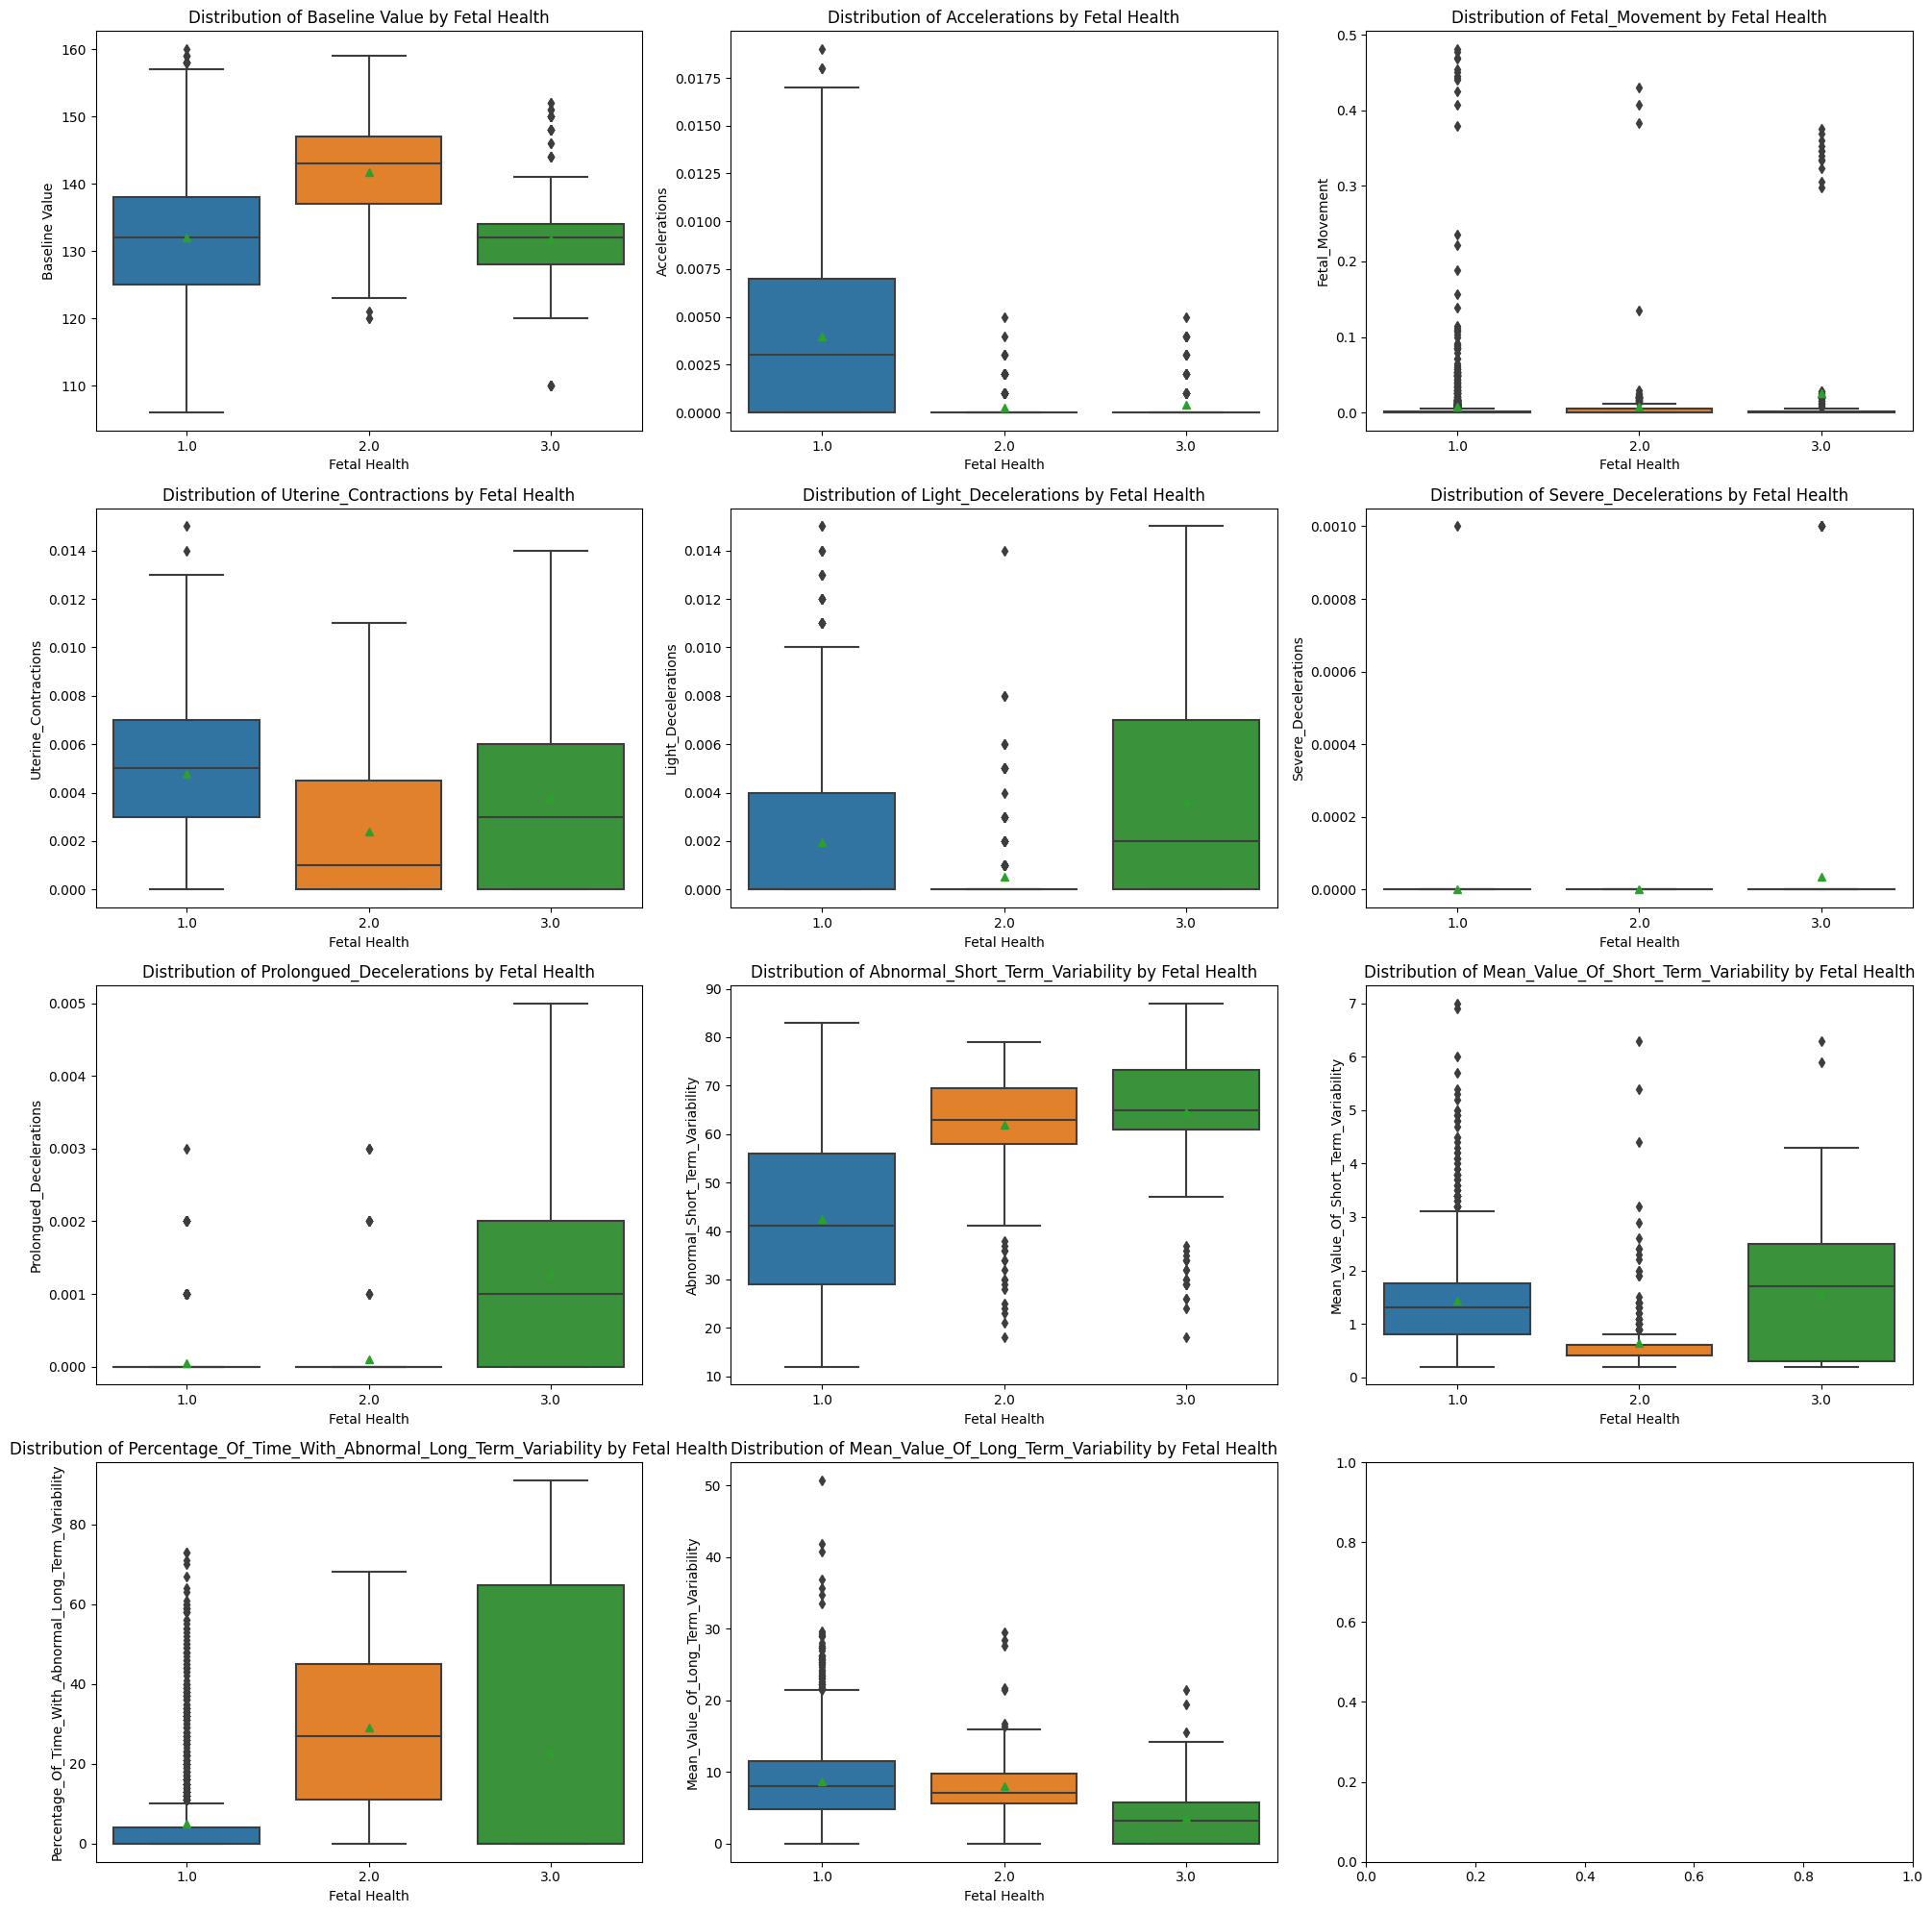

In [8]:
# plot boxplots

# List of variables for y-axis 
variables = ["baseline value", "accelerations", "fetal_movement", "uterine_contractions", "light_decelerations", 
            "severe_decelerations", "prolongued_decelerations", "abnormal_short_term_variability", "mean_value_of_short_term_variability",
            "percentage_of_time_with_abnormal_long_term_variability", "mean_value_of_long_term_variability"]

# Adjust number of rows based on number of variables
num_rows = (len(variables) + 2) // 3
fig, axes = plt.subplots(nrows=4, ncols= 3, figsize=(20, 20))

for i, var in enumerate(variables):
    sns.boxplot(
        x="fetal_health",
        y=var, 
        showmeans=True, 
        data=df,
        ax=axes.flat[i] # Use flattened axes for one-dimensional iteration
    )
    
    axes.flat[i].set_xlabel("Fetal Health")
    axes.flat[i].set_ylabel(var.title())  
    axes.flat[i].set_title(f"Distribution of {var.title()} by Fetal Health")

plt.tight_layout()  
plt.show()

### CLASS BALANCE

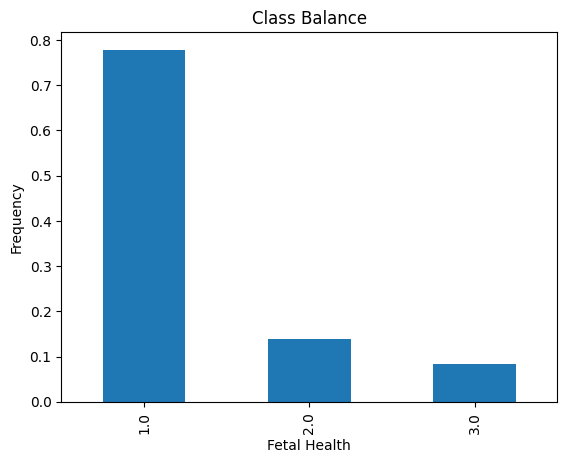

In [9]:
# plot class balance
df["fetal_health"].value_counts(normalize=True).plot(kind="bar", xlabel="Fetal Health", ylabel="Frequency", title="Class Balance");

This is good news! for advocates for fetal mortality. Since it looks like the most of the CTGs in the dataset are Normal. However, it also show that we have an imbalanced dataset where the majority class is far bigger than the minority classes. 

### CORRELATION

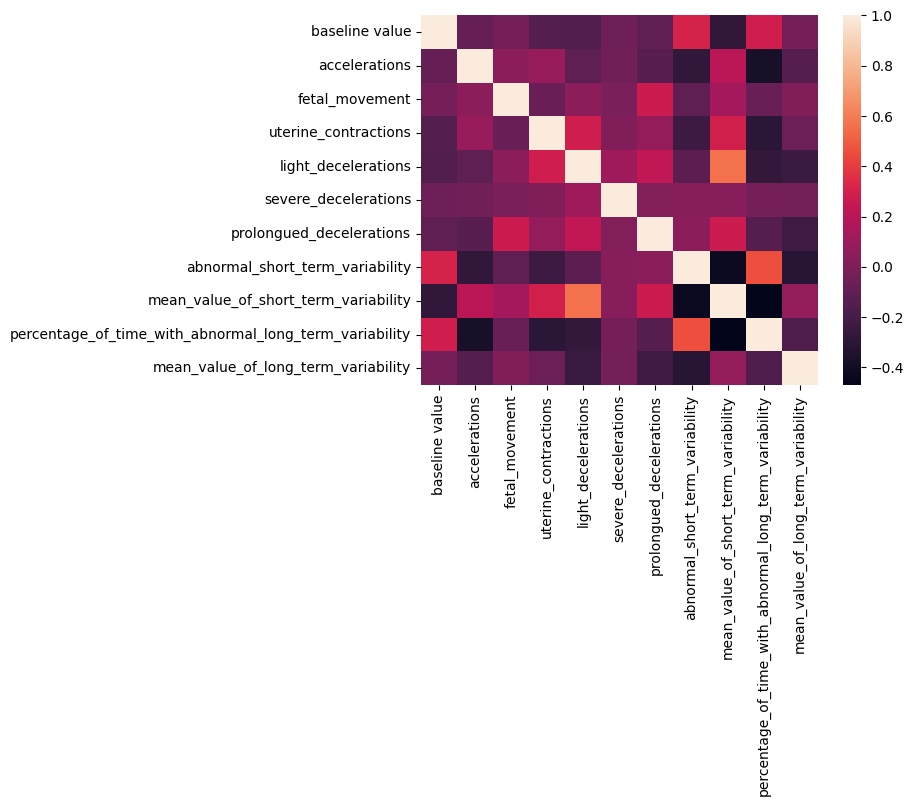

In [10]:
# correlation heatmap
correlation = df.select_dtypes("number").drop(columns="fetal_health").corr()
#plot heatmap
sns.heatmap(correlation);

In [11]:
# Import libraries 
from scipy.stats import pearsonr

# List of feature names (assuming these columns exist in your DataFrame)
features = ["baseline value", "accelerations", "fetal_movement", "uterine_contractions", 
            "light_decelerations", "severe_decelerations", "prolongued_decelerations", 
            "abnormal_short_term_variability", "mean_value_of_short_term_variability", 
            "percentage_of_time_with_abnormal_long_term_variability", "mean_value_of_long_term_variability"]

# Iterate through features and calculate correlation
for feature in features:
  correlation, _ = pearsonr(df["fetal_health"], df[feature])
  print(f"Correlation between fetal_health and {feature}: {correlation}")

Correlation between fetal_health and baseline value: 0.14815112725707966
Correlation between fetal_health and accelerations: -0.36406579288786367
Correlation between fetal_health and fetal_movement: 0.08801001103425966
Correlation between fetal_health and uterine_contractions: -0.20489372127986774
Correlation between fetal_health and light_decelerations: 0.05887048804049426
Correlation between fetal_health and severe_decelerations: 0.1319341255892369
Correlation between fetal_health and prolongued_decelerations: 0.48485918632134833
Correlation between fetal_health and abnormal_short_term_variability: 0.47119075284667544
Correlation between fetal_health and mean_value_of_short_term_variability: -0.10338211704475025
Correlation between fetal_health and percentage_of_time_with_abnormal_long_term_variability: 0.42614641992406527
Correlation between fetal_health and mean_value_of_long_term_variability: -0.22679706542348083


## CONCLUSION ON EDA

From the explanatory data analysis, we learn that:
1. The data is imbalanced. 
2. Many of the features are highly skewed because it has missing values (i.e. Zeros). The best imputation strategy is likely the median, not the mean.
3. Finally, we have auto correlation issues which means that we should steer clear of linear models and try a tree-based model instead. 

To address multicollinearity, we will remove highly correlated variables.

# BUILD MODEL: LOGISTIC REGRESSION

In [12]:
def wrangle (filepath):
    
    # read csv file into dataframe
    df = pd.read_csv(filepath) 
    
    # identify and drop leaky columns
    drop_cols = [col for col in df.columns if "histogram" in col]
    df.drop(columns = drop_cols, inplace=True)
    
    # drop multicollinearity column
    drop_cols = ["prolongued_decelerations", "abnormal_short_term_variability", "percentage_of_time_with_abnormal_long_term_variability"]
    
    # drop columns
    df.drop(columns = drop_cols, inplace=True)
     
    return df

In [13]:
df = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Foetal Health\\foetal_health_clean.csv")
print("df.shape:", df.shape)
print("df.info:", df.info())
df.head()

df.shape: (2126, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 9 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   baseline value                        2126 non-null   float64
 1   accelerations                         2126 non-null   float64
 2   fetal_movement                        2126 non-null   float64
 3   uterine_contractions                  2126 non-null   float64
 4   light_decelerations                   2126 non-null   float64
 5   severe_decelerations                  2126 non-null   float64
 6   mean_value_of_short_term_variability  2126 non-null   float64
 7   mean_value_of_long_term_variability   2126 non-null   float64
 8   fetal_health                          2126 non-null   float64
dtypes: float64(9)
memory usage: 149.6 KB
df.info: None


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,mean_value_of_short_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.5,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,2.1,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,2.1,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,2.4,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,2.4,19.9,1.0


### SPLIT

In [14]:
target = "fetal_health"
X = df.drop(columns = target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2126, 8)
y shape: (2126,)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1700, 8)
y_train shape: (1700,)
X_test shape: (426, 8)
y_test shape: (426,)


### BASELINE

In [16]:
# calculate baseline
lr_acc_baseline = y_train.value_counts(normalize=True).max()*100
print("Baseline Accuracy:", round(lr_acc_baseline, 2),"%")

Baseline Accuracy: 77.76 %


### ITERATE

In [17]:
# Build model
lr_model = make_pipeline(OneHotEncoder(use_cat_names=True), LogisticRegression(max_iter=1000))

# fit model to training data 
lr_model.fit(X_train, y_train);

### EVALUATE

In [18]:
# calculate training and test accuracy for the model
lr_acc_train = accuracy_score(y_train, lr_model.predict(X_train))*100
lr_acc_test = lr_model.score(X_test, y_test)*100
    
print("Training Accuracy:", round(lr_acc_train, 2),"%")
print("Test Accuracy:", round(lr_acc_test, 2),"%")

Training Accuracy: 79.47 %
Test Accuracy: 80.05 %


### COMMUNICATE

In [19]:
y_train_pred_proba = lr_model.predict_proba(X_train)
print(y_train_pred_proba[:5])

[[0.93761775 0.04864498 0.01373727]
 [0.73925155 0.24216308 0.01858536]
 [0.97870054 0.01001461 0.01128485]
 [0.77494503 0.1216601  0.10339487]
 [0.6734     0.25477398 0.07182602]]


In [20]:
# extract feature names and importances
features = lr_model.named_steps["onehotencoder"].get_feature_names_out()
importances = lr_model.named_steps["logisticregression"].coef_[0]

In [21]:
# create odds ratios
odds_ratios = pd.Series(np.exp(importances), index = features).sort_values()
odds_ratios

fetal_movement                          0.143382
light_decelerations                     0.869447
baseline value                          0.970442
severe_decelerations                    0.993977
mean_value_of_long_term_variability     1.079787
uterine_contractions                    1.573020
mean_value_of_short_term_variability    1.966326
accelerations                           3.074162
dtype: float64

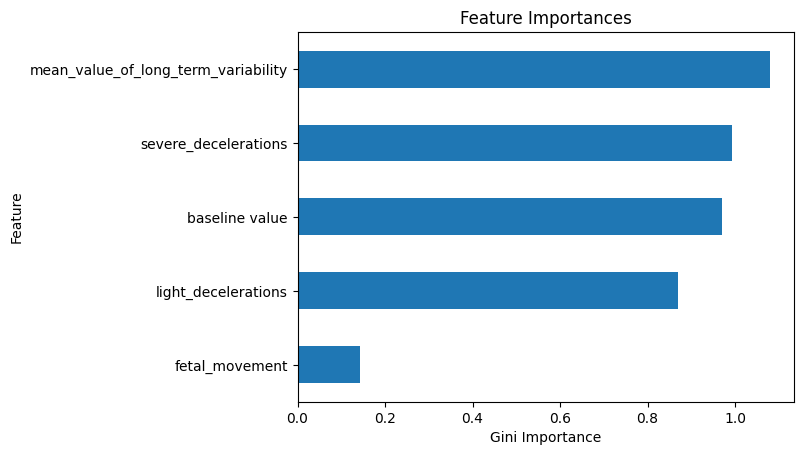

In [22]:
# plot odd ratios
# horizontal bar chart with largets coefficients from odds ratios
odds_ratios.head().plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importances");

### CONFUSION MATRIX

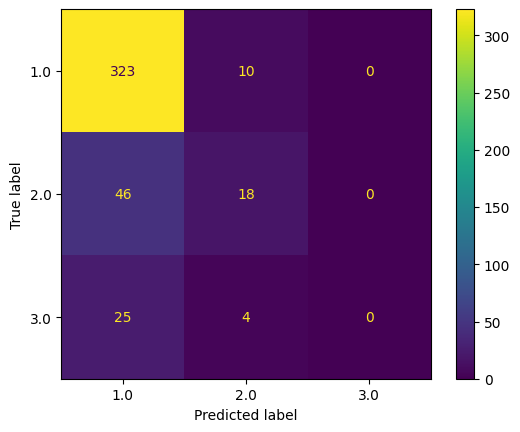

In [23]:
# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test);

### CLASSIFICATION REPORT

In [24]:
# print classification report
print(classification_report(y_test, lr_model.predict(X_test), zero_division=1))

              precision    recall  f1-score   support

         1.0       0.82      0.97      0.89       333
         2.0       0.56      0.28      0.38        64
         3.0       1.00      0.00      0.00        29

    accuracy                           0.80       426
   macro avg       0.79      0.42      0.42       426
weighted avg       0.79      0.80      0.75       426



# BUILD MODEL: DECISION TREES

In [25]:
def wrangle (filepath):
    
    # read csv file into dataframe
    df = pd.read_csv(filepath) 
    
    # identify and drop leaky columns
    drop_cols = [col for col in df.columns if "histogram" in col]
    df.drop(columns = drop_cols, inplace=True)
     
    return df

In [26]:
df = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Foetal Health\\foetal_health_clean.csv")
print("df.shape:", df.shape)
print("df.info:", df.info())
df.head()

df.shape: (2126, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_sho

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


### SPLIT

In [27]:
target = "fetal_health"
X = df.drop(columns = target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2126, 11)
y shape: (2126,)


### RANDOMISED TRAIN TEST SPLIT

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1700, 11)
y_train shape: (1700,)
X_test shape: (426, 11)
y_test shape: (426,)


In [29]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_val shape:", X_test.shape)
print("y_val shape:", y_test.shape)

X_train shape: (1360, 11)
y_train shape: (1360,)
X_val shape: (426, 11)
y_val shape: (426,)


### BASELINE

In [30]:
# create baseline accuracy score
dt_acc_baseline = y_train.value_counts(normalize=True).max()*100
print("Baseline Accuracy:", round(dt_acc_baseline, 2),"%")

Baseline Accuracy: 77.28 %


### ITERATE

In [31]:
# build model
dt_model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(random_state=42))

# fit model to training data 
dt_model.fit(X_train, y_train);

### EVALUATE MODEL 1

In [32]:
# calculate training and test accuracy for the model
dt_acc_train = accuracy_score(y_train, dt_model.predict(X_train))*100
dt_acc_val = dt_model.score(X_val, y_val)*100
    
print("Training Accuracy:", round(dt_acc_train, 2),"%")
print("Validation Accuracy:", round(dt_acc_val, 2), "%")

Training Accuracy: 100.0 %
Validation Accuracy: 90.0 %


In [33]:
# tree Depth
tree_depth = dt_model.named_steps["decisiontreeclassifier"].get_depth()
print("Tree Depth:", tree_depth)

Tree Depth: 14


### HYPERPARAMETER TUNING

In [34]:
# create range of possible values
depth_hyperparams = range(1, 15, 2)

In [35]:
# create lists for training and validation accuracy scores
training_acc = []
validation_acc = []

for d in depth_hyperparams:
    # create model with "max_depth" of "d"
    test_model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth=d, random_state=42))
    
    # fit model to training data
    test_model.fit(X_train, y_train)
    
    # calculate training accuracy score and append to "training_acc"
    training_acc.append(test_model.score(X_train, y_train))
    
    # calculate validation accuracy acore to "training_acc"
    validation_acc.append(test_model.score(X_val, y_val))
    
    print("Training Accuracy Score:", training_acc[:3])
    print("Validation Accuracy Score:", validation_acc[:3]);

Training Accuracy Score: [0.825735294117647]
Validation Accuracy Score: [0.7941176470588235]
Training Accuracy Score: [0.825735294117647, 0.8963235294117647]
Validation Accuracy Score: [0.7941176470588235, 0.8352941176470589]
Training Accuracy Score: [0.825735294117647, 0.8963235294117647, 0.9308823529411765]
Validation Accuracy Score: [0.7941176470588235, 0.8352941176470589, 0.861764705882353]
Training Accuracy Score: [0.825735294117647, 0.8963235294117647, 0.9308823529411765]
Validation Accuracy Score: [0.7941176470588235, 0.8352941176470589, 0.861764705882353]
Training Accuracy Score: [0.825735294117647, 0.8963235294117647, 0.9308823529411765]
Validation Accuracy Score: [0.7941176470588235, 0.8352941176470589, 0.861764705882353]
Training Accuracy Score: [0.825735294117647, 0.8963235294117647, 0.9308823529411765]
Validation Accuracy Score: [0.7941176470588235, 0.8352941176470589, 0.861764705882353]
Training Accuracy Score: [0.825735294117647, 0.8963235294117647, 0.9308823529411765]
V

### VALIDATION CURVE

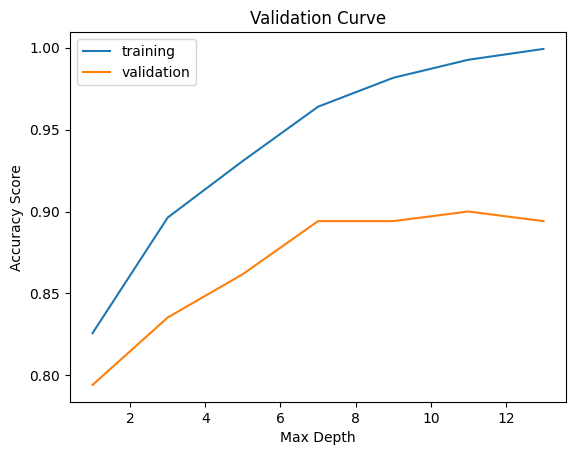

In [36]:
# plot "depth_hyperparams", "training_acc"
plt.plot(depth_hyperparams, training_acc, label="training")
plt.plot(depth_hyperparams, validation_acc, label="validation")

# label axes
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.title("Validation Curve")
plt.legend();

The ideal scenario is to have the training and validation curves close together, indicating the model is learning underlying patterns, which is not the case in the above visualisation. This gap between the curves suggests overfitting and need to adjust hyperparameters.

### EVALUATE MODEL 2

Based on the above visualisation, the max_depth value leads to the best validation score. Retrain the model with the max_depth. Let's resolve the overfitting problem with this new max_depth.

In [37]:
# build model
dt_model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(max_depth=3, random_state=42))

# fit model to training data 
dt_model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [38]:
# calculate training and test accuracy for the model
dt_acc_train = accuracy_score(y_train, dt_model.predict(X_train))*100
dt_acc_val = dt_model.score(X_val, y_val)*100
    
print("Training Accuracy:", round(dt_acc_train, 2),"%")
print("Validation Accuracy:", round(dt_acc_val, 2), "%")

Training Accuracy: 89.63 %
Validation Accuracy: 83.53 %


In [39]:
# test accuracy score
dt_acc_test = dt_model.score(X_test, y_test)*100
print("Test Accuracy:", round(dt_acc_test, 2),"%")

Test Accuracy: 90.38 %


### COMMUNICATE

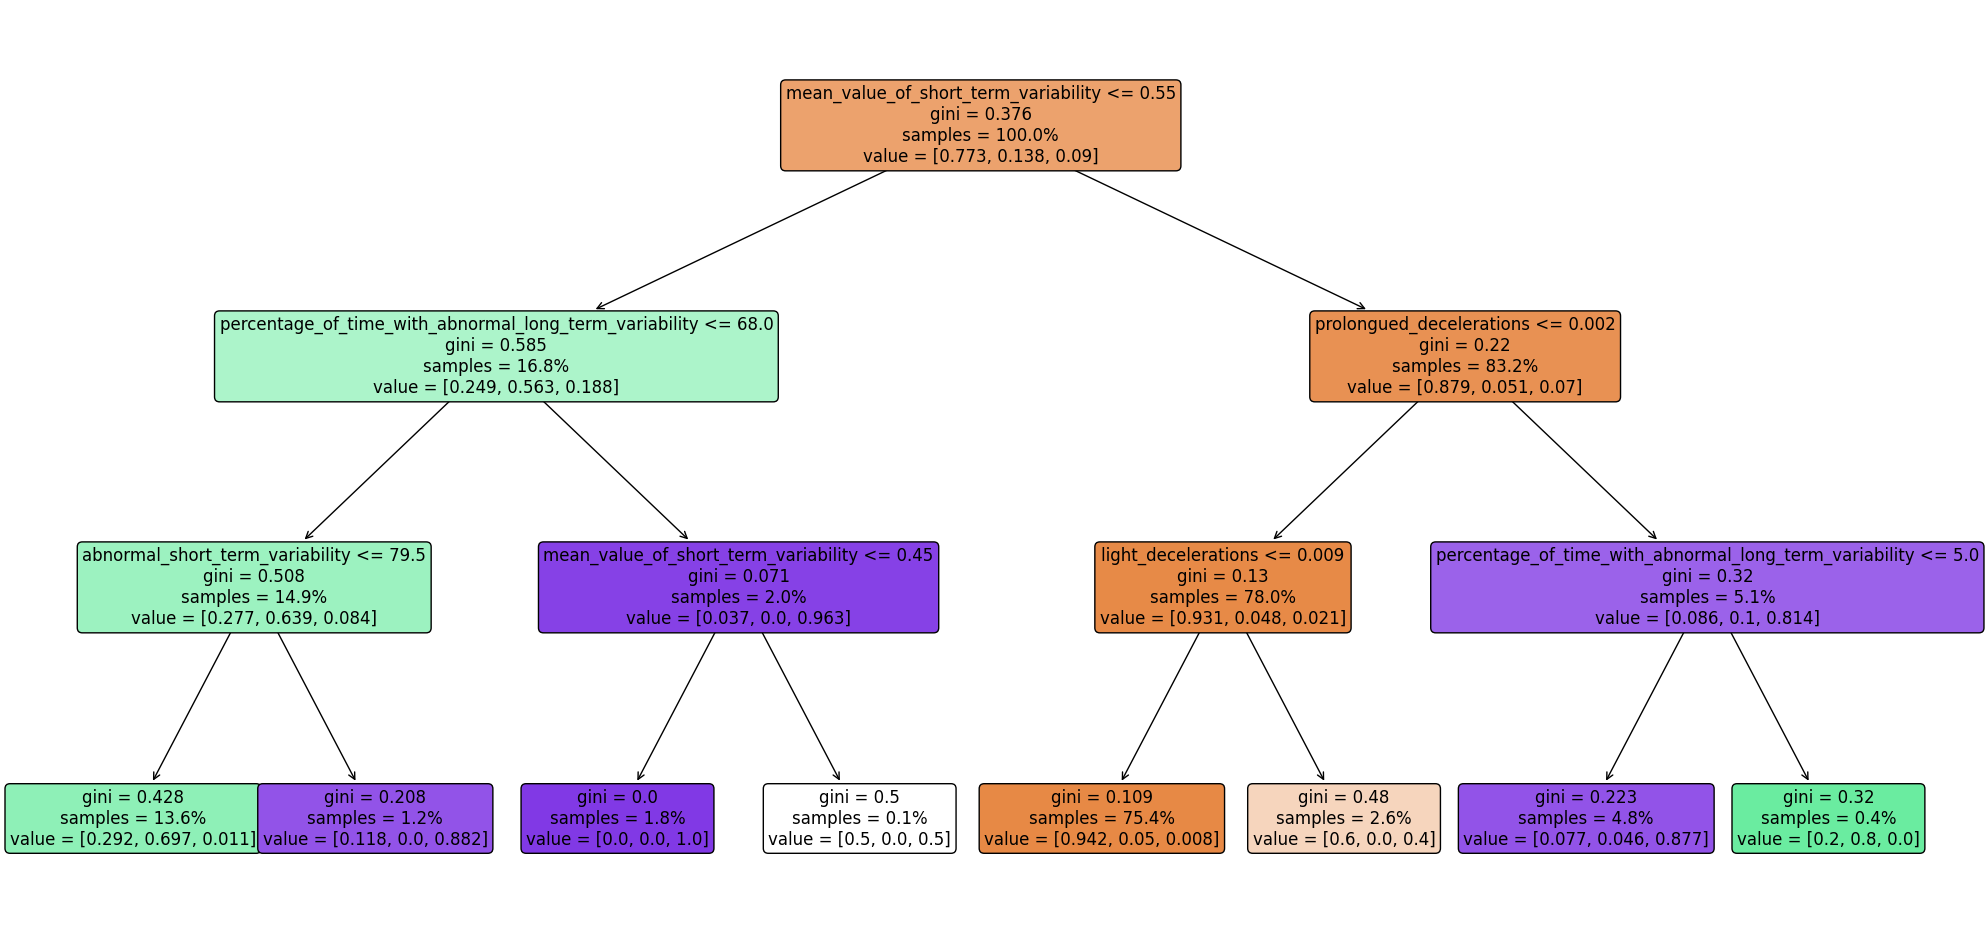

In [40]:
fig, ax = plt.subplots(figsize=(25, 12))

# convert X_train.columns to a list
feature_names = list(X_train.columns)

# plot tree
plot_tree(
    decision_tree=dt_model.named_steps["decisiontreeclassifier"],
    feature_names=feature_names,
    filled=True,
    rounded=True,
    proportion=True,
    max_depth=3,
    fontsize=12,
    ax=ax
);

In [41]:
# extract feature names and importances
features = X_train.columns
importances = dt_model.named_steps["decisiontreeclassifier"].feature_importances_

print("Features:", features[:3])
print("Importances:", importances[:3])

Features: Index(['baseline value', 'accelerations', 'fetal_movement'], dtype='object')
Importances: [0. 0. 0.]


In [42]:
feat_imp = pd.Series(importances, index = features).sort_values()
print(feat_imp.sum()) # sum upto 1
feat_imp.head()

1.0


baseline value          0.0
accelerations           0.0
fetal_movement          0.0
uterine_contractions    0.0
severe_decelerations    0.0
dtype: float64

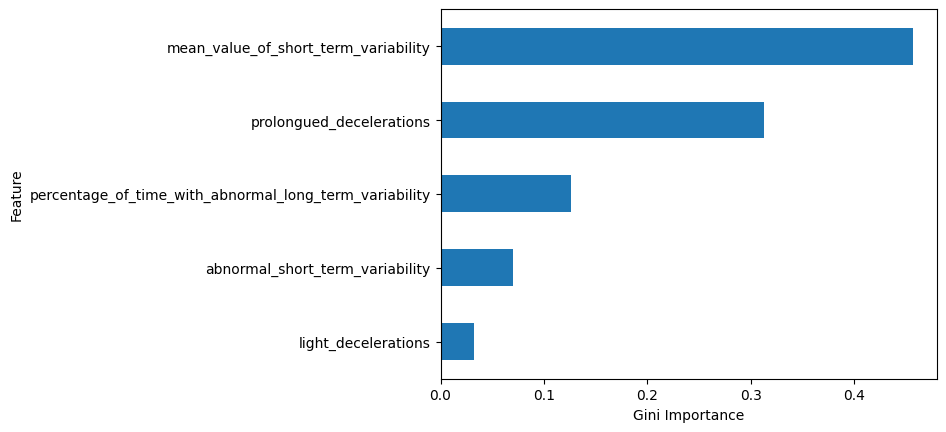

In [43]:
# plot bar chart with all features in "feat_imp"
feat_imp.tail().plot(kind="barh")
plt.xlabel("Gini Importance")
plt.ylabel("Feature");

### CONFUSION MATRIX

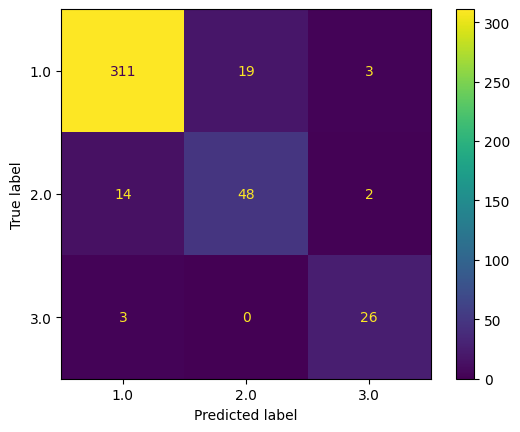

In [44]:
# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(dt_model, X_test, y_test);

### CLASSIFICATION REPORT

In [45]:
# print classification report
print(classification_report(y_test, dt_model.predict(X_test)));

              precision    recall  f1-score   support

         1.0       0.95      0.93      0.94       333
         2.0       0.72      0.75      0.73        64
         3.0       0.84      0.90      0.87        29

    accuracy                           0.90       426
   macro avg       0.83      0.86      0.85       426
weighted avg       0.91      0.90      0.90       426



# BUILD MODEL: RANDOM FOREST

In [46]:
def wrangle (filepath):
    
    # read csv file into dataframe
    df = pd.read_csv(filepath) 
    
    # identify and drop leaky columns
    drop_cols = [col for col in df.columns if "histogram" in col]
    df.drop(columns = drop_cols, inplace=True)
     
    return df

In [47]:
df = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Foetal Health\\foetal_health_clean.csv")
print("df.shape:", df.shape)
print("df.info:", df.info())
df.head()

df.shape: (2126, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_sho

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


### SPLIT

In [48]:
target = "fetal_health"
X = df.drop(columns = target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2126, 11)
y shape: (2126,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1700, 11)
y_train shape: (1700,)
X_test shape: (426, 11)
y_test shape: (426,)


### RESAMPLE

#### UNDER SAMPLING

In [50]:
# under sampling
under_sampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)
print("X_train_under shape:", X_train_under.shape)
X_train_under.head()

X_train_under shape: (441, 11)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
1783,121.0,0.006,0.002,0.004,0.002,0.0,0.0,56.0,1.4,0.0,12.3
2056,127.0,0.000,0.001,0.005,0.000,0.0,0.0,63.0,0.7,59.0,4.0
1027,135.0,0.009,0.000,0.005,0.003,0.0,0.0,24.0,2.5,0.0,3.9
1234,125.0,0.002,0.000,0.004,0.001,0.0,0.0,30.0,1.1,3.0,11.0
2044,128.0,0.000,0.006,0.009,0.009,0.0,0.0,63.0,2.5,0.0,1.2


In [51]:
y_train_under.value_counts(normalize=True)

1.0    0.333333
2.0    0.333333
3.0    0.333333
Name: fetal_health, dtype: float64

#### OVER SAMPLING

In [52]:
# over sampling
over_sampler = RandomOverSampler(random_state=42)
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)
print("X_train_over shape:", X_train_over.shape)
X_train_over.head()

X_train_over shape: (3966, 11)


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability
0,125.0,0.000,0.0,0.008,0.000,0.0,0.0,32.0,1.1,3.0,13.0
1,140.0,0.000,0.0,0.001,0.000,0.0,0.0,60.0,0.8,32.0,11.2
2,122.0,0.000,0.0,0.000,0.001,0.0,0.0,20.0,1.8,0.0,13.8
3,137.0,0.005,0.0,0.005,0.002,0.0,0.0,36.0,0.9,0.0,5.0
4,142.0,0.003,0.0,0.004,0.000,0.0,0.0,46.0,0.7,27.0,5.9


In [53]:
y_train_over.value_counts(normalize=True)

1.0    0.333333
2.0    0.333333
3.0    0.333333
Name: fetal_health, dtype: float64

### BASELINE

In [54]:
# create baseine accuracy score
rf_acc_baseline = y_train.value_counts(normalize=True).max()*100
print("Baseline Accuracy:", round(rf_acc_baseline, 2),"%")

Baseline Accuracy: 77.76 %


### ITERATE

In [55]:
# fit on "X_train", "y_train"
model_reg = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_reg.fit(X_train, y_train)


# fit on "X_train_under", "y_train_under"
model_under = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_under.fit(X_train_under, y_train_under)


# fit on "X_train_over", "y_train_over"
model_over = make_pipeline(
    SimpleImputer(strategy="median"), DecisionTreeClassifier(random_state=42)
)
model_over.fit(X_train_over, y_train_over)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

### EVALUATE

In [56]:
# calculate training and test accuracy for the three (3) models
for m in [model_reg, model_under, model_over]:
    acc_train = m.score(X_train, y_train)*100
    acc_test = m.score(X_test, y_test)*100
    
    print("Training Accuracy:", round(acc_train, 2),"%")
    print("Test Accuracy:", round(acc_test, 2),"%")

Training Accuracy: 100.0 %
Test Accuracy: 92.25 %
Training Accuracy: 87.82 %
Test Accuracy: 84.27 %
Training Accuracy: 100.0 %
Test Accuracy: 92.96 %


In [57]:
# tree depth in model_over
depth = model_over.named_steps["decisiontreeclassifier"].get_depth()
print(depth)

17


### COMMUNICATE

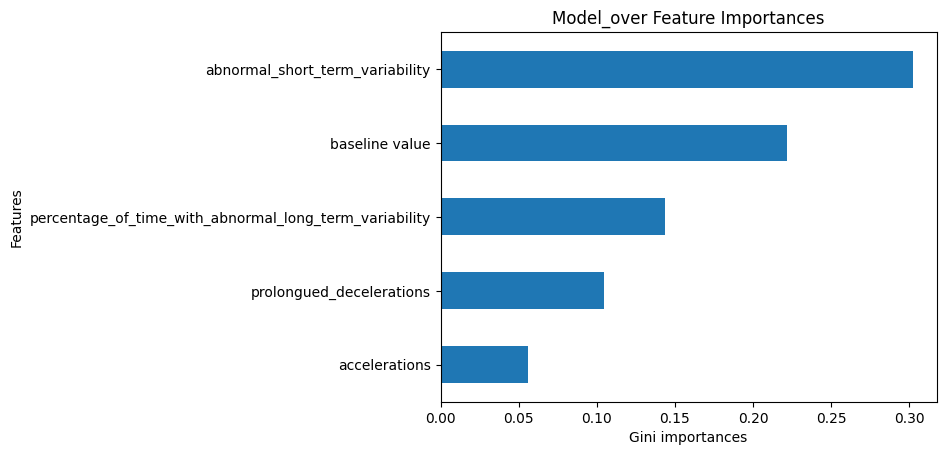

In [58]:
# feature importance
importances = model_over.named_steps["decisiontreeclassifier"].feature_importances_

# plot importances into a series
feat_imp = pd.Series(importances, index = X_train_over.columns).sort_values()

# plot series
feat_imp.tail().plot(kind="barh")
plt.xlabel("Gini importances")
plt.ylabel("Features")
plt.title("Model_over Feature Importances");

### ITERATE

In [59]:
# fit on "X_train", "y_train"
clf = make_pipeline(SimpleImputer(), RandomForestClassifier(random_state=42))
print(clf)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])


### CROSS-VALIDATION

In [60]:
# create hyperparameters
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "randomforestclassifier__n_estimators": range(25, 100, 25),
    "randomforestclassifier__max_depth": range(10, 50, 10)    
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'randomforestclassifier__n_estimators': range(25, 100, 25),
 'randomforestclassifier__max_depth': range(10, 50, 10)}

### ITERATE

In [61]:
rf_model = GridSearchCV(clf, param_grid = params, cv=5, n_jobs=-1, verbose=1)
rf_model

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

### FIT MODEL

In [62]:
rf_model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': range(10, 50, 10),
                         'randomforestclassifier__n_estimators': range(25, 100, 25),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

### GRIDSEARCHCV RESULTS

In [63]:
# extract cross validation results from model
cv_results = pd.DataFrame(rf_model.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.126765,0.012772,0.006800,0.000749,10,25,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.968514,0.968474,0.981084,0.973518,0.981084,0.974535,0.005654,19
1,0.137398,0.027811,0.007799,0.001939,10,25,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.968514,0.968474,0.981084,0.973518,0.981084,0.974535,0.005654,19
2,0.220189,0.022157,0.009800,0.000980,10,50,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973552,0.963430,0.976040,0.970996,0.983607,0.973525,0.006577,21
3,0.224589,0.030004,0.010601,0.000800,10,50,median,"{'randomforestclassifier__max_depth': 10, 'ran...",0.973552,0.963430,0.976040,0.970996,0.983607,0.973525,0.006577,21
4,0.345012,0.042791,0.016399,0.002058,10,75,mean,"{'randomforestclassifier__max_depth': 10, 'ran...",0.969773,0.965952,0.976040,0.972257,0.981084,0.973021,0.005201,23


### EXTRACT BEST HYPERPARAMETERS

In [64]:
# Extract best HyperParameters
rf_model.best_params_

{'randomforestclassifier__max_depth': 30,
 'randomforestclassifier__n_estimators': 50,
 'simpleimputer__strategy': 'mean'}

### EVALUATE

In [65]:
# calculate training and test accuracy scores for the model
rf_acc_train = rf_model.score(X_train_over, y_train_over)*100
rf_acc_test = rf_model.score(X_test, y_test)*100
    
print("Training Accuracy:", round(rf_acc_train, 2),"%")
print("Test Accuracy:", round(rf_acc_test, 2),"%")

Training Accuracy: 99.97 %
Test Accuracy: 93.43 %


Text(0.5, 1.0, 'Feature Importances')

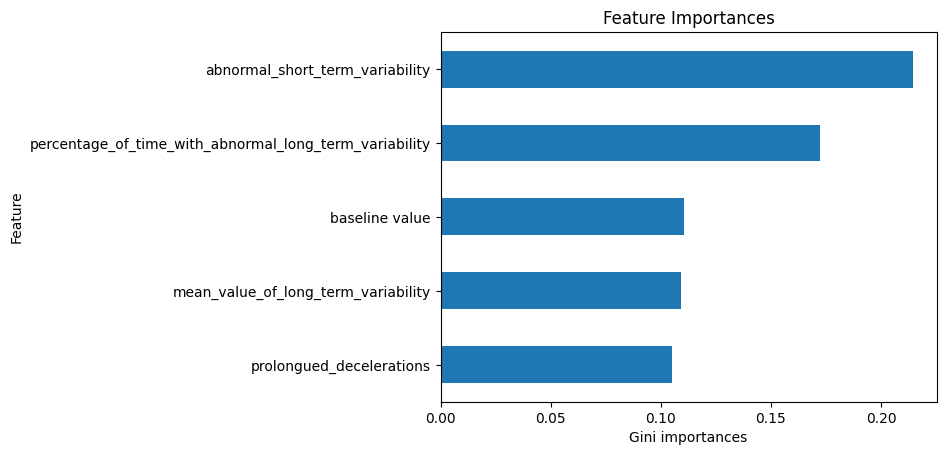

In [66]:
# get feature names from training data
features = X_train_over.columns

# extract importances from model
importances = rf_model.best_estimator_.named_steps["randomforestclassifier"].feature_importances_

# create a series with feature names and importances
feat_imp = pd.Series(importances, index = features).sort_values()

# plot series
feat_imp.tail().plot(kind="barh")
plt.xlabel("Gini importances")
plt.ylabel("Feature")
plt.title("Feature Importances")

### CONFUSION MATRIX

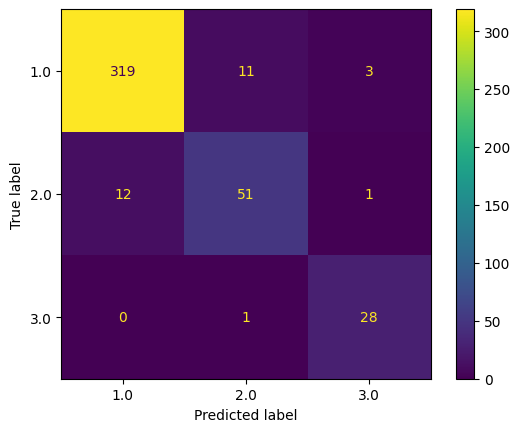

In [67]:
# plot confusion matrix 
ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test);

### CLASSIFICATION REPORT

In [68]:
# print classification report
print(classification_report(y_test, rf_model.predict(X_test)));

              precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       333
         2.0       0.81      0.80      0.80        64
         3.0       0.88      0.97      0.92        29

    accuracy                           0.93       426
   macro avg       0.88      0.91      0.89       426
weighted avg       0.93      0.93      0.93       426



# BUILD MODEL: GRADIENT BOOSTING TREES

In [69]:
def wrangle (filepath):
    
    # read csv file into dataframe
    df = pd.read_csv(filepath) 
    
    # identify and drop leaky columns
    drop_cols = [col for col in df.columns if "histogram" in col]
    df.drop(columns = drop_cols, inplace=True)
     
    return df

In [70]:
df = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Foetal Health\\foetal_health_clean.csv")
print("df.shape:", df.shape)
print("df.info:", df.info())
df.head()

df.shape: (2126, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_sho

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


### SPLIT

In [71]:
target = "fetal_health"
X = df.drop(columns = target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2126, 11)
y shape: (2126,)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1700, 11)
y_train shape: (1700,)
X_test shape: (426, 11)
y_test shape: (426,)


### BASELINE

In [73]:
gbt_acc_baseline = y_train.value_counts(normalize=True).max()*100
print("Baseline Accuracy:", round(gbt_acc_baseline, 2),"%")

Baseline Accuracy: 77.76 %


### ITERATE

#### GRADIENT BOOSTING TREES

In [74]:
# Build model
clf = make_pipeline(SimpleImputer(), GradientBoostingClassifier());

In [75]:
# Build model
dt_model = make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(random_state=42))

# fit model to training data 
dt_model.fit(X_train, y_train)

Pipeline(steps=[('ordinalencoder', OrdinalEncoder(cols=[], mapping=[])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

#### HYPERPARAMETER GRID

In [76]:
params = {
    "simpleimputer__strategy": ["mean", "median"],
    "gradientboostingclassifier__n_estimators": range(20, 31, 5),
    "gradientboostingclassifier__max_depth": range(2,5)
}
params

{'simpleimputer__strategy': ['mean', 'median'],
 'gradientboostingclassifier__n_estimators': range(20, 31, 5),
 'gradientboostingclassifier__max_depth': range(2, 5)}

#### GRID SEARCH CV

In [77]:
#build model
gbt_model = GridSearchCV(clf, param_grid=params, cv=5, n_jobs=-1, verbose=1)

# fit model to over-sampled training data
gbt_model.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer', SimpleImputer()),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__max_depth': range(2, 5),
                         'gradientboostingclassifier__n_estimators': range(20, 31, 5),
                         'simpleimputer__strategy': ['mean', 'median']},
             verbose=1)

#### CV RESULTS

In [78]:
results = pd.DataFrame(gbt_model.cv_results_)
results.sort_values("rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gradientboostingclassifier__max_depth,param_gradientboostingclassifier__n_estimators,param_simpleimputer__strategy,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
16,0.601397,0.028698,0.003800,7.485454e-04,4,30,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.944584,0.941992,0.955864,0.947037,0.950820,0.948059,0.004867,1
17,0.550154,0.016464,0.002600,4.893191e-04,4,30,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.944584,0.939470,0.955864,0.948298,0.950820,0.947807,0.005552,2
15,0.502331,0.037410,0.003200,3.998284e-04,4,25,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.940806,0.939470,0.949559,0.947037,0.941992,0.943773,0.003863,3
14,0.576331,0.082314,0.004200,1.166278e-03,4,25,mean,"{'gradientboostingclassifier__max_depth': 4, '...",0.939547,0.938209,0.949559,0.945776,0.941992,0.943017,0.004162,4
13,0.424288,0.053493,0.002999,6.217196e-07,4,20,median,"{'gradientboostingclassifier__max_depth': 4, '...",0.930730,0.936948,0.943253,0.940731,0.938209,0.937975,0.004220,5


#### BEST HYPERPARAMETERS

In [79]:
# extract best hyperparameters
gbt_model.best_params_

{'gradientboostingclassifier__max_depth': 4,
 'gradientboostingclassifier__n_estimators': 30,
 'simpleimputer__strategy': 'mean'}

### EVALUATE

In [80]:
# calculate training and test accuracy for the model
gbt_acc_train = gbt_model.score(X_train_over, y_train_over)*100
gbt_acc_test = gbt_model.score(X_test, y_test)*100
    
print("Training Accuracy:", round(gbt_acc_train, 2),"%")
print("Test Accuracy:", round(gbt_acc_test, 2),"%")

Training Accuracy: 96.07 %
Test Accuracy: 88.97 %


Text(0.5, 1.0, 'Feature Importances')

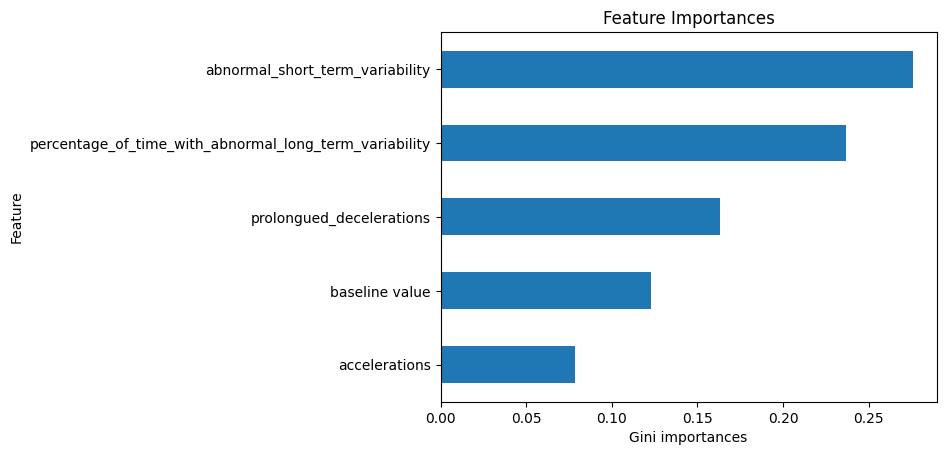

In [81]:
# get feature names from training data
features = X_train.columns

# extract importances from model
importances = gbt_model.best_estimator_.named_steps["gradientboostingclassifier"].feature_importances_

# create a series with feature names and importances
feat_imp = pd.Series(importances, index = features).sort_values()

# plot series
feat_imp.tail().plot(kind="barh")
plt.xlabel("Gini importances")
plt.ylabel("Feature")
plt.title("Feature Importances")

### CONFUSION MATRIX

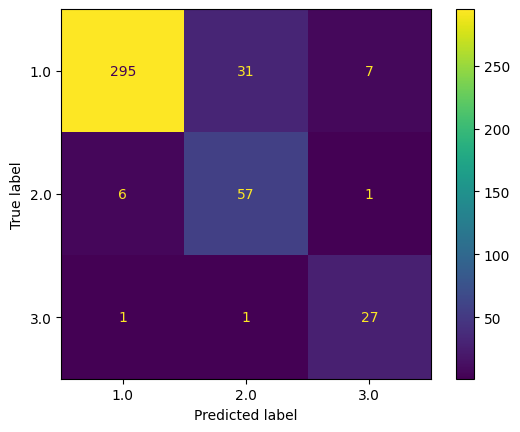

In [82]:
# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(gbt_model, X_test, y_test);

This matrix shows how our data is imbalanced and why accuracy isn't always the best metric for judging whether or not a model is giving us what we want. After all, 70% of the CTGs in our dataset are normal. The model has to predict {"fetal health": Normal} and it will be right 70% of the time.
Instead, we will evaluate our model using two metrics: *precision* and *recall*. The precison score will only predict that a fetal health is Normal if its very confident in its prediction. The recall score will make sure to identify all fetal health that will be Normal, even if that means being incorrect sometimes. 

### CLASSIFICATION REPORT

In [83]:
# print classification report
print(classification_report(y_test, gbt_model.predict(X_test)))

              precision    recall  f1-score   support

         1.0       0.98      0.89      0.93       333
         2.0       0.64      0.89      0.75        64
         3.0       0.77      0.93      0.84        29

    accuracy                           0.89       426
   macro avg       0.80      0.90      0.84       426
weighted avg       0.91      0.89      0.90       426



Interpretation:
    There ia high precision, recall and F1 score for the Normal class, with the minorty classes (Suspect and Pathological) slightly lower. Ideally the model to perform better, we anticipated high precision, racll and F1 score for the minority classes. This shows the models is struggling leading to missed diagnoses of critical cases.

In [84]:
results = pd.DataFrame({
    "Model": ["Logistic Regression",
             "Decision Trees",
              "Random Forest",
              "Gradient Boosting Trees"
             ],
    "Baseline Score":[lr_acc_baseline,
                      dt_acc_baseline,
                      rf_acc_baseline,
                      gbt_acc_baseline,
                         ],
    "Training Score": [lr_acc_train,
                       dt_acc_train,
                       rf_acc_train,
                       gbt_acc_train,
             ],
    "Test Score": [lr_acc_test, 
                   dt_acc_test,
                   rf_acc_test,
                   gbt_acc_test,
             ],
    
})

result_df = results.sort_values(by="Test Score", ascending=False)
result_df = result_df.set_index("Model")
result_df.head()

,Baseline Score,Training Score,Test Score
Model,,,
Random Forest,77.764706,99.974786,93.427230
Decision Trees,77.279412,89.632353,90.375587
Gradient Boosting Trees,77.764706,96.066566,88.967136
Logistic Regression,77.764706,79.470588,80.046948


# BUILD MODEL: XGBOOST

In [85]:
def wrangle (filepath):
    
    # read csv file into dataframe
    df = pd.read_csv(filepath) 
    
    # identify and drop leaky columns
    drop_cols = [col for col in df.columns if "histogram" in col]
    df.drop(columns = drop_cols, inplace=True)
     
    return df

In [86]:
df = wrangle("\\Users\\Cheryl\\Documents\\Python Scripts\\Foetal Health\\foetal_health_clean.csv")
print("df.shape:", df.shape)
print("df.info:", df.info())
df.head()

df.shape: (2126, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 12 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_sho

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,1.0


### SPLIT

In [87]:
target = "fetal_health"
X = df.drop(columns = target)
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (2126, 11)
y shape: (2126,)


In [88]:
# Check the current classes in y
print(np.unique(y))  

# Remap the classes to start from 0
y = y - 1

# Verify the remapped classes
print(np.unique(y))  

[1. 2. 3.]
[0. 1. 2.]


Accuracy: 94.37 %
Precision: 94.22 %
Recall: 94.37 %
F1-score: 94.24 %


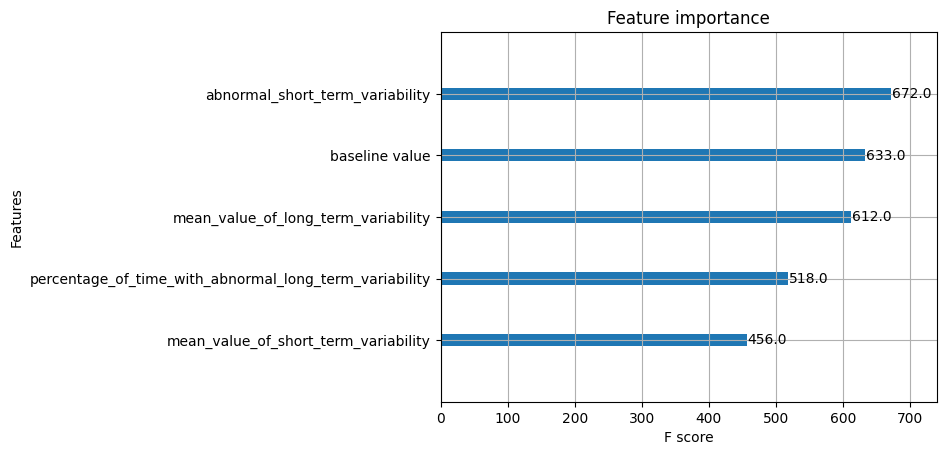

In [89]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost model parameters (adjust hyperparameters as needed)
xgb_model = XGBClassifier(objective='multi:softprob', 
                          n_estimators=100, 
                          learning_rate=0.1, 
                          max_depth=5, 
                          gamma=0.1, 
                          subsample=0.8, 
                          colsample_bytree=0.8, 
                          random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance (replace with your preferred metrics)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred, average='weighted')*100
recall = recall_score(y_test, y_pred, average='weighted')*100
f1 = f1_score(y_test, y_pred, average='weighted')*100

print("Accuracy:", round(accuracy, 2),"%")
print("Precision:", round(precision, 2), "%")
print("Recall:", round(recall, 2), "%")
print("F1-score:", round(f1, 2), "%")

# Feature Importance
from xgboost import plot_importance

plot_importance(xgb_model, max_num_features=5);

### CONFUSION MATRIX

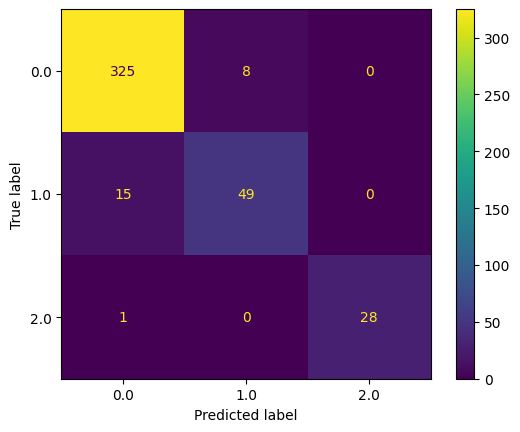

In [90]:
# plot confusion matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test, y_test);

### CLASSIFICATION REPORT

In [91]:
# print classification report
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       333
         1.0       0.86      0.77      0.81        64
         2.0       1.00      0.97      0.98        29

    accuracy                           0.94       426
   macro avg       0.94      0.90      0.92       426
weighted avg       0.94      0.94      0.94       426



### SAVE MODEL

In [92]:
# save model
with open("xgb_model-5-1-2024.pkl", "wb") as f:
    pickle.dump(xgb_model, f)

In [93]:
def make_predictions(data_filepath, model_filepath):
    # wrangle csv file
    X_test = wrangle(data_filepath)
    
    # load model
    with open(model_filepath, "rb") as f:
             xgb_model = pickle.load(f)
    
    # generate predictions
    y_test_pred = xgb_model.predict(X_test)
    
    # put predictions into series with name "Fetal health" and same index as X_test
    y_test_pred = pd.Series(y_test_pred, index=X_test.index, name="fetal health")
    
    return y_test_pred

In [94]:
y_test_pred = make_predictions(
    data_filepath = "\\Users\\Cheryl\\Documents\\Python Scripts\Foetal Health\\Test Data.csv",
    model_filepath = "xgb_model-5-1-2024.pkl"
)
print("predictions shape:", y_test_pred.shape)
y_test_pred.head()

predictions shape: (2126,)


0    1
1    0
2    0
3    0
4    0
Name: fetal health, dtype: int64